# Lab 2 - Xử lý điểm ảnh: Biến đổi cường độ ảnh


1. Viết chương trình xử lý diểm ảnh 
1.1 Biến đổi cường độ ảnh

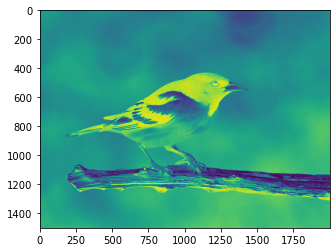

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open("bird.png").convert('L')

in_1 = np.asarray(img)

in_2 = 255 - in_1

# convert image 2 from ndarray to image
new_img = Image.fromarray(in_2)

img.show()
new_img.show()

plt.imshow(new_img)
plt.show()



1.2 Thay đổi chất lượng ảnh với power law

<ipython-input-13-f5ac2859984b>:27: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


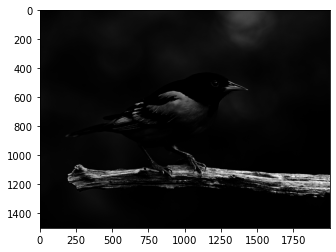

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

gamma = 5

b1 = im_1.astype(float)

b2 = np.max(b1)

b3 = b1/b2

b2 = np.log(b3) * gamma

c = np.exp(b2) * 255.0

c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

1.3 Thay đổi cường độ điểm ảnh với Log Transformationn

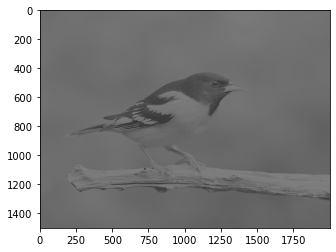

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

b1 = im_1.astype(float)

b2 = np.max(b1)

c = (128.0 * np.log(1 + b1))/np.log(1 + b2)

c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

1.4 Histogram equalization

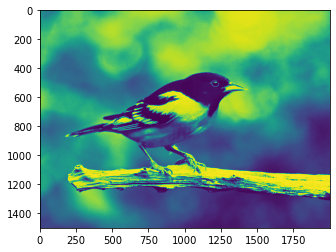

In [12]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image 1 into an ndarray
im1 = np.asarray(img)

#convert 2D ndarray from 1D array
b1 = im1.flatten()

#histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])

#cumulative distribution function is computed
cdf = hist.cumsum()

#places where cdf=0 is masked or ignored and
#rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

#histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m

#the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

#cdf values are assigned in the flattened array
im2 = cdf[b1]

#im2 is 1D so we use reshape command to
#make it into 2D
im3 = np.reshape(im2, im1.shape)

#converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4)
plt.show()

1.5 Thay đổi ảnh với Contrast StretchingStretching

0 255


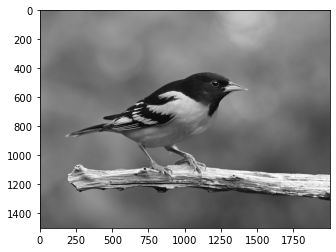

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im1 = np.asarray(img)

b = im1.max()
a = im1.min()
print(a, b)


c = im1.astype(float)

im2 = 255 * (c - a) / (b - a)

im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6 Biến đổi Fourier

In [ ]:
1.6.1 Biến đổi ảnh với Fast Fourier

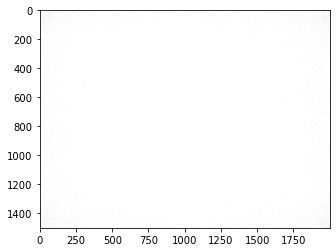

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.fftpack

img = Image.open('bird.png').convert('L')

im1 = np.asarray(img)

C = abs(scipy.fftpack.fft2(im1))

d=scipy.fftpack.fftshift(C)
d=d.astype(float)


c = im1.astype(float)

im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.2 Lọc ảnh trong miền tần suất

Butterworth Lowpass filter

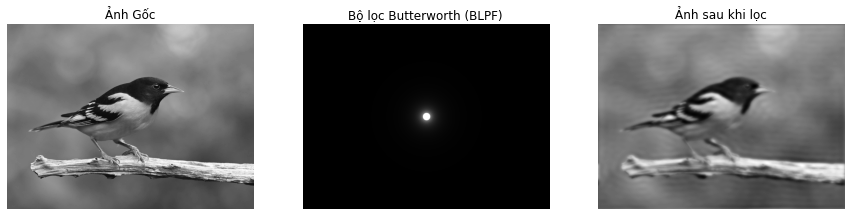

In [32]:
from PIL import Image
import math
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

try:
    img = Image.open('bird.png').convert('L')
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file ảnh 'world_cup.jpg'.")
    print("Hãy đảm bảo file ảnh nằm đúng thư mục.")
    img = Image.fromarray(np.random.randint(0, 256, (256, 256), dtype=np.uint8))

iml = np.asarray(img)

fft_result = scipy.fft.fft2(iml)
fft_shifted = scipy.fft.fftshift(fft_result)

M, N = fft_shifted.shape

H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d0 = 30.0
n = 1
t1 = 2 * n

for i in range(M):
    for j in range(N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t1)

con = fft_shifted * H

ifft_shifted = scipy.fft.ifftshift(con)
ifft_result = scipy.fft.ifft2(ifft_shifted)

e = np.abs(ifft_result)
im3 = Image.fromarray(e.astype(np.uint8))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh Gốc')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(H, cmap='gray')
plt.title('Bộ lọc Butterworth (BLPF)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(im3, cmap='gray')
plt.title('Ảnh sau khi lọc')
plt.axis('off')

plt.show()

Butterworth highpass Filter

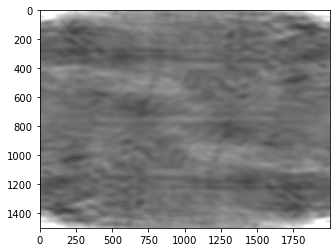

In [29]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
iml = np.asarray(img)

c = abs(scipy.fftpack.fft2(iml))
d = scipy.fftpack.fftshift(c)

M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 1
t2 = 2 * t1

for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1/ (1 + (r/d_0)**t2)

H = H.astype(float)
img_H = Image.fromarray(H)

con = d * H

e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
img.show()
plt.imshow(im3)
plt.show()

# Bài Tập

1. Các phép biến đổi cơ bản 
Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh bằng phím tắt (I, G, L, H, C):

I: Image inverse transformation (Nghịch đảo ảnh)
G: Gamma-Correction (Hiệu chỉnh Gamma)
L: Log Transformation (Biến đổi Logarit)
H: Histogram equalization (Cân bằng lược đồ xám)
C: Contrast Stretching (Giãn độ tương phản)

In [ ]:
import cv2
import numpy as np
import os

def inverse_transform(image):
    """Phép nghịch đảo ảnh (Image Inverse)"""
    return 255 - image

def gamma_correction(image, gamma=1.5):
    """Phép hiệu chỉnh Gamma (Gamma Correction)"""
    img_normalized = image / 255.0
    corrected_img = np.power(img_normalized, gamma)
    return np.uint8(corrected_img * 255)

def log_transform(image):
    """Phép biến đổi Logarit (Log Transformation)"""
    c = 255 / np.log(1 + np.max(image))
    log_img = c * (np.log(image + 1))
    return np.uint8(log_img)

def histogram_equalization(image):
    """Phép cân bằng lược đồ xám (Histogram Equalization)"""
    if len(image.shape) > 2:
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_img = image
    return cv2.equalizeHist(gray_img)

def contrast_stretching(image):
    """Phép giãn độ tương phản (Contrast Stretching)"""
    if len(image.shape) > 2:
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_img = image
        
    r_min = np.min(gray_img)
    r_max = np.max(gray_img)
    
    if r_max == r_min:
        return image
        
    stretched_img = image.copy()
    stretched_img = (image - r_min) * (255.0 / (r_max - r_min))
    return np.uint8(stretched_img)

def main():
    """Hàm chính để chạy chương trình xử lý ảnh"""
    image_path = 'bird.png'
    output_dir = 'output'

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Đã tạo thư mục '{output_dir}' để lưu kết quả.")

    if not os.path.exists(image_path):
        print(f"Lỗi: Không tìm thấy file '{image_path}'.")
        print(f"Hãy chắc chắn bạn đã đặt file 'bird.png' vào cùng thư mục với script.")
        return

    original_img = cv2.imread(image_path)
    if original_img is None:
        print(f"Lỗi: Không thể đọc file ảnh tại '{image_path}'.")
        return

    name, ext = os.path.splitext(os.path.basename(image_path))

    print("\n--- CHƯƠNG TRÌNH BIẾN ĐỔI ẢNH ---")
    print("Cửa sổ ảnh gốc đang được hiển thị.")
    print("Nhấn phím trên cửa sổ đó để thực hiện biến đổi:")
    print("  'i' - Nghịch đảo ảnh")
    print("  'g' - Hiệu chỉnh Gamma")
    print("  'l' - Biến đổi Logarit")
    print("  'h' - Cân bằng lược đồ xám")
    print("  'c' - Giãn độ tương phản")
    print("  'q' - Thoát chương trình")
    print("------------------------------------")
    
    
    cv2.imshow('Anh goc: bird.png', original_img)
    
    while True:
        key = cv2.waitKey(0)

        if key == ord('q'):
            print("Đang thoát chương trình...")
            break
            
        transformed_img = None
        transform_name = ''

        if key == ord('i'):
            transformed_img = inverse_transform(original_img)
            transform_name = 'inverse'
        elif key == ord('g'):
            transformed_img = gamma_correction(original_img)
            transform_name = 'gamma'
        elif key == ord('l'):
            transformed_img = log_transform(original_img)
            transform_name = 'log'
        elif key == ord('h'):
            transformed_img = histogram_equalization(original_img)
            transform_name = 'histogram'
        elif key == ord('c'):
            transformed_img = contrast_stretching(original_img)
            transform_name = 'contrast_stretch'
        else:
            print("Phím không hợp lệ. Vui lòng thử lại.")
            continue

        if transformed_img is not None:
            result_window_name = f'Ket qua: {transform_name}'
            cv2.imshow(result_window_name, transformed_img)
            
            output_path = os.path.join(output_dir, f'{name}_{transform_name}{ext}')
            
            cv2.imwrite(output_path, transformed_img)
            print(f"-> Đã thực hiện '{transform_name}' và lưu kết quả tại: {output_path}")
            
            cv2.waitKey(0)
            cv2.destroyWindow(result_window_name)

    cv2.destroyAllWindows()
    print("\n--- Chương trình đã kết thúc ---")

if __name__ == '__main__':
    main()